In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import transforms


In [2]:
class n_net(nn.Module):
    def __init__(self):
        super(n_net,self).__init__()
        self.n1 = nn.Linear(784,100)
        self.relu = nn.ReLU()
        self.n2 = nn.Linear(100,100)
        self.n3 = nn.Linear(100,10)
    def forward(self,x):
        x1 = self.n1(x)
        x2 = self.relu(x1)
        x3 = self.n2(x2)
        x4 = self.relu(x3)
        x5 = self.n3(x4)
        return x5

In [3]:
DOWNLOAD_ROOT = 'MNIST_data/'

dataset_1 = datasets.MNIST(root=DOWNLOAD_ROOT,train=True,transform=transforms.ToTensor(),download=True)
dataset_2 = datasets.MNIST(root=DOWNLOAD_ROOT,train=False,transform=transforms.ToTensor(),download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [4]:
BATCH_SIZE = 128
dataset_1_loader = DataLoader(dataset_1, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
dataset_2_loader = DataLoader(dataset_2, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)

In [5]:
LEARNING_RATE = 0.01
torch.manual_seed(7777)
model = n_net()
model.zero_grad()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=LEARNING_RATE)

In [6]:
TOTAL_BATCH = len(dataset_1_loader)
EPOCHS = np.arange(0,100)
loss_list = []
accuracy_list = []
for epoch in EPOCHS:
    cost = 0
    for image, label in dataset_1_loader:
        image = image.reshape(BATCH_SIZE,784)
        optimizer.zero_grad()
        predicted = model.forward(image)
        loss = loss_function(predicted,label)
        loss.backward()
        optimizer.step()
        cost+=loss
    with torch.no_grad():
        total = 0
        correct = 0
        for image, label in dataset_2_loader:
            image = image.reshape(BATCH_SIZE,784)
            out = model(image)
            _,predict = torch.max(out.data, 1)
            total += label.size(0)
            correct += (predict==label).sum()
    average_cost = cost/TOTAL_BATCH
    accuracy = 100*correct/total
    loss_list.append(average_cost.detach().numpy())
    accuracy_list.append(accuracy)
    print("epoch : {} | loss : {:.6f}" .format(epoch, average_cost))
    print("Accuracy : {:.2f}".format(accuracy))
    print("---------------------")



epoch : 0 | loss : 2.178834
Accuracy : 57.07
---------------------
epoch : 1 | loss : 1.333700
Accuracy : 80.80
---------------------
epoch : 2 | loss : 0.680126
Accuracy : 85.71
---------------------
epoch : 3 | loss : 0.496337
Accuracy : 88.24
---------------------
epoch : 4 | loss : 0.420925
Accuracy : 89.54
---------------------
epoch : 5 | loss : 0.380196
Accuracy : 90.07
---------------------
epoch : 6 | loss : 0.353884
Accuracy : 90.80
---------------------
epoch : 7 | loss : 0.334605
Accuracy : 91.01
---------------------
epoch : 8 | loss : 0.319346
Accuracy : 91.41
---------------------
epoch : 9 | loss : 0.306681
Accuracy : 91.78
---------------------
epoch : 10 | loss : 0.295436
Accuracy : 91.92
---------------------
epoch : 11 | loss : 0.284978
Accuracy : 92.25
---------------------
epoch : 12 | loss : 0.275932
Accuracy : 92.57
---------------------
epoch : 13 | loss : 0.267201
Accuracy : 92.90
---------------------
epoch : 14 | loss : 0.258845
Accuracy : 92.88
------------

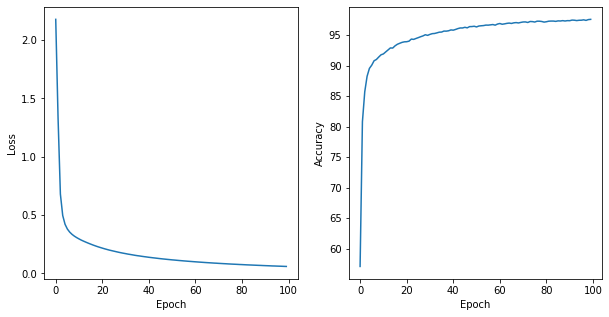

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(EPOCHS,loss_list)
plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(EPOCHS, accuracy_list)
plt.show()